In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from src.utils_for_estimate import (get_points,
                                    find_heights_and_shadows,
                                    )
from src.shadow_height_estimator import (
                                        attach_heights, 
                                        rotate_points,
                                        rotate_angle,
                                        estimate_buildings_height,
                                        attach_heights,
                                        buildings_info
                                        
                                        )
from src.visualization_masks import (draw_masks,
                                    draw_random_masks,
                                    draw_heigths_map
                                    )
from src.annotations.annotation import anns_and_images
from src.annotations.coco2masks import coco2masks
import numpy as np

In [21]:
dataset_dir = '../3d_tools_dataset/'
annot_file = dataset_dir + 'annotations/instances_default.json'
images_directory = dataset_dir + 'image_png/'
image_directory = dataset_dir + 'image_png/test_1.png'

In [22]:
SCALE = np.float16(0.1)
SUN_AZIMUTH_ANGLE = np.uint8(200)
SUN_ELEVATION_ANGLE = np.uint8(40)
THRESHOLD = np.uint8(5)
BROWN = (np.uint8(128), np.uint8(64), np.uint8(48))
BLUE = (np.uint8(0), np.uint8(0), np.uint8(255))
COLORS = np.array([BROWN, BLUE])

In [23]:
_, anns = anns_and_images(coco_annotation_file=annot_file, images_directory=images_directory)
image, masks = coco2masks(coco_annotation_file=annot_file, images_directory=images_directory)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [24]:
shadows_points = get_points(anns)[0]
building_points = get_points(anns)[1]
angle_of_rotate = rotate_angle(SUN_AZIMUTH_ANGLE)

rotated_points_of_shadows = rotate_points(points=shadows_points, rotate_angle=angle_of_rotate)
rotated_points_of_buildings = rotate_points(points=building_points, rotate_angle=angle_of_rotate)
print(rotated_points_of_buildings)


{3: [(2373.1, -3598.15), (2493.38, -3758.05), (2464.75, -3774.56), (2332.59, -3848.99), (2328.39, -3841.75), (2307.82, -3854.77), (2309.77, -3867.74), (2271.04, -3889.5), (2262.21, -3887.81), (2258.64, -3882.56), (2157.69, -3939.78), (2161.11, -3944.62), (2062.85, -3999.19), (2053.37, -4000.75), (2047.51, -3997.9), (1968.12, -4043.72), (1990.03, -4085.01), (1929.9, -4118.35), (1903.64, -4127.91), (1863.28, -4055.71), (1853.52, -4060.37), (1817.63, -3995.22), (1828.03, -3990.33), (1786.91, -3914.93), (1918.22, -3844.28), (1920.96, -3847.47), (1915.71, -3849.78), (1917.22, -3853.03), (2045.08, -3779.61), (2041.56, -3772.98), (2134.24, -3724.15), (2136.06, -3732.18), (2201.35, -3697.59), (2194.58, -3691.36), (2281.62, -3643.78), (2324.29, -3617.82), (2339.64, -3611.36)], 4: [(3602.5, -2783.93), (3671.91, -2732.2), (3772.52, -3008.63)], 5: [(3211.44, -3140.98), (3406.88, -2999.89), (3617.0, -3279.74), (3424.33, -3419.31)], 6: [(2520.58, -3835.07), (2649.35, -3992.74), (2644.18, -3999.86), 

In [25]:
shadows_heigth = estimate_buildings_height(rotated_points_of_shadows, SCALE, SUN_ELEVATION_ANGLE)

print(shadows_heigth)

find = find_heights_and_shadows(rotated_points_of_shadows,
                                rotated_points_of_buildings,
                                shadows_heigth,
                                )

attach = attach_heights(shadows_heigth, find)

{0: 21.86, 1: 53.51, 2: 61.96, 7: 32.21, 10: 15.08, 11: 23.64, 14: 17.8, 15: 20.25}


In [26]:
hyperparameters = {'anns': anns,
                'sun_azimuth_angle': SUN_AZIMUTH_ANGLE,
                'scale': SCALE,
                'sun_elevation_angle': SUN_ELEVATION_ANGLE,
                'threshold': THRESHOLD,
                }

In [27]:
build_info = buildings_info(hyperparameters)
for iter, build in build_info.items():
    print(iter, build['heigths'])

9 12.16
3 26.19
8 16.71
4 9.93
12 12.48
13 10.32
5 10.65


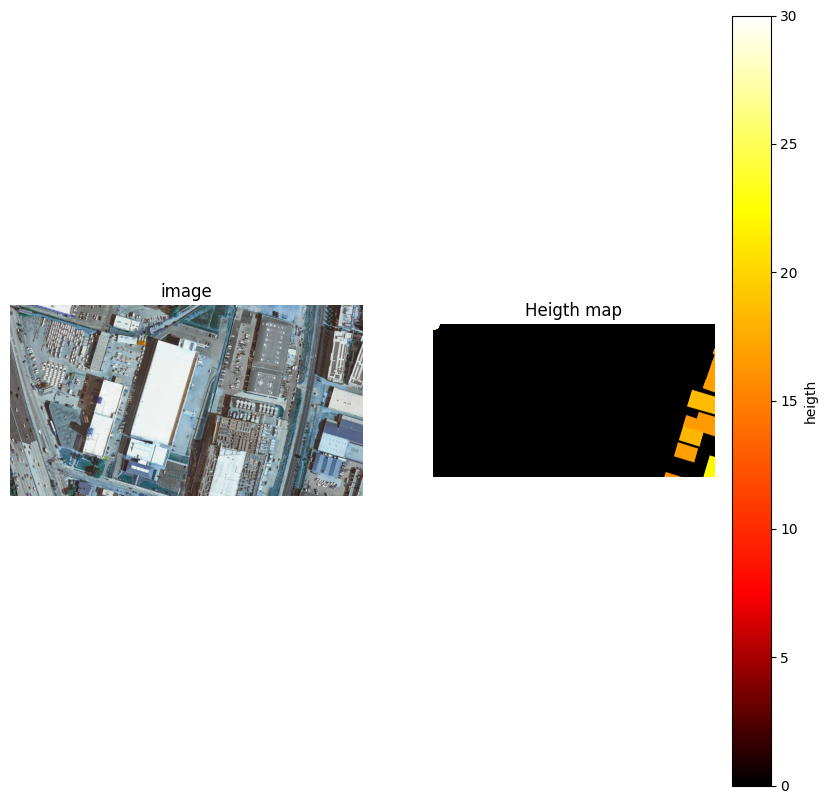

In [29]:

map = draw_heigths_map(image[0], masks, build_info)
img = image[0]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10))

ax[0].imshow(img)
ax[0].set_title('image')
ax[0].set_axis_off()

colors = [(0, 0, 0), (1, 0, 0), (1, 0.5, 0), (1, 1, 0), (1, 1, 1)]
cmap_name = 'custom_red_white_black'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

x = np.linspace(0, 30)
y = np.linspace(0,1)
plt.scatter(x, y, c=x, cmap=custom_cmap)  # Здесь используется цветовая карта 'viridis'
a = plt.colorbar(label='heigth')  # Добавляем шкалу изменения цвета


ax[1].imshow(map)
ax[1].set_title('Heigth map')
ax[1].set_axis_off()

plt.show()